This is Phil's code from class on Feb 28

In [2]:
import numpy as np
import matplotlib.pyplot as plt

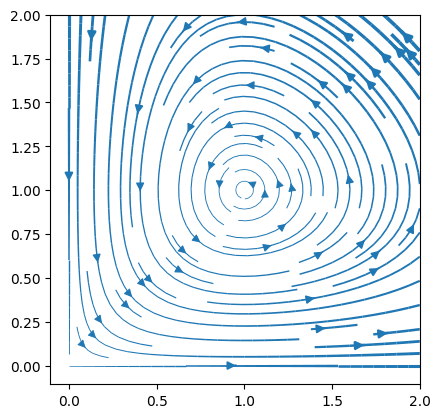

In [11]:

def chem_rxn_network(y, t):

    x,y1 = y

    # Parameters
    a = 1
    b = 1
    d = 1
    g = 1


    dxdt = a * x - b * x * y1
    dydt = d * x * y1 - g * y1

    final_dydt = [dxdt, dydt]
    
    return final_dydt
    

def plot_flow_field(ODE, u_range, v_range, n_grid=100):
    """
    Plots the flow field with line thickness proportional to speed.
    
    Parameters
    ----------
    ODE : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    u_range : array_like, shape (2,)
        Range of values for u-axis.
    v_range : array_like, shape (2,)
        Range of values for v-axis.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """

    ax = plt.axes()
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)
    #how does this work ^^ ? 
    """it's giving you points cross a plane?"""
    #uu is columns and vv is rows


    # Compute derivatives
    """This is the direction of the arrows... ?"""
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = ODE(np.array([uu[i,j], vv[i,j]]), None)

    # Compute speed
    """this is the line thickness"""
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed, with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, density=1)#, color='thistle')

    return ax


ax = plot_flow_field(chem_rxn_network, (0,2), (0,2))
ax.set_aspect('equal') 